### Проектная работа по модулю “Математика и статистика вPython”

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline

### 1. Загрузим файл hr.csv и познакомимся с данными

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [5]:
# В отчете было предупреждение о дубликатах (Dataset has 3008 duplicate rows ). Удалим их
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
sales                    11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Датафрейм сформировался нормально. Видим, что пропусков в данных нет. И ошибок на первый взгляд в данных нет. Дубликаты удалили.
Смотрим основные метрики для числовых столбцов, понимая, что они бессмыслены для Work_accident, left и promotion_last_5years.

Опишем датафрейм:
- **satisfaction_level**: уровень удовлетворения сотрудника (или сотрудником?) Значения: 0.09 - 1
- **last_evaluation**: оценка, данная сотруднику на последней аттестации. Значения: 0.36 - 1
- **number_project**: число проектов, в которых сотрудник был вовлечен. Значения: 2 - 7
- **average_monthly_hours**: среднее количество отработанных сотрудником часов в месяц. Значения: 96-310
- **time_spend_company**: количество лет, которое сотрудник проработал в компании. Значения: 2-10
- **Work_accident**: были ли инциденты с сотрудником на работе (0 = нет, 1 = да)
- **left**: покинул ли работник компанию (0 = нет, 1 = да)
- **promoted_last_5years**: был ли сотрудник повышен в должности за последние 5 лет (0 = нет, 1 = да)
- **sales**: подразделение компании, в котором сотрудник работает ('sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD')
- **salary**: уровень зарплаты ('low', 'medium', 'high')

In [7]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
# Рассчитаем моду, т.к. ее нет в методе describe
df.mode()

# у столбца average_montly_hours есть две моды, 
# поэтому для остальных столбцов, имеющих одну моду, во второй строке стоят NaN

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.74,0.55,4.0,149,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Переменная salary ранговая, для работы переведем ее в числовой формат.
df['salary_cat'] = pd.factorize(df.salary)[0] + 1

df.sample(7)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_cat
6176,0.41,0.48,6,165,4,0,0,0,IT,medium,2
422,0.86,1.00,5,257,5,0,1,0,technical,medium,2
5233,0.48,0.68,4,163,2,1,0,0,technical,low,1
4529,0.52,0.67,3,244,3,0,0,0,sales,low,1
9256,0.83,0.84,2,149,3,0,0,0,sales,low,1
10012,0.86,0.93,3,199,3,1,0,0,sales,medium,2
4716,0.80,0.79,4,168,3,0,0,0,management,low,1


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [11]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_cat
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.000502
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000551
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.038164
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.000058
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.118882
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.087851
salary_cat,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,1.000000


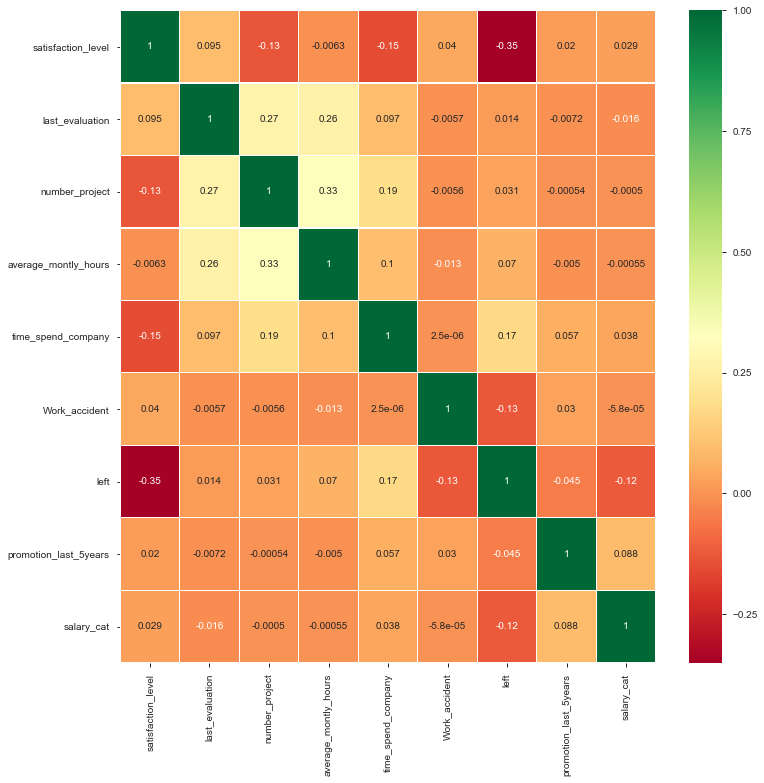

In [15]:
corr_mx_pearson = df.corr(method='pearson')
corr_mx_pearson

sns.heatmap(corr_mx_pearson,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

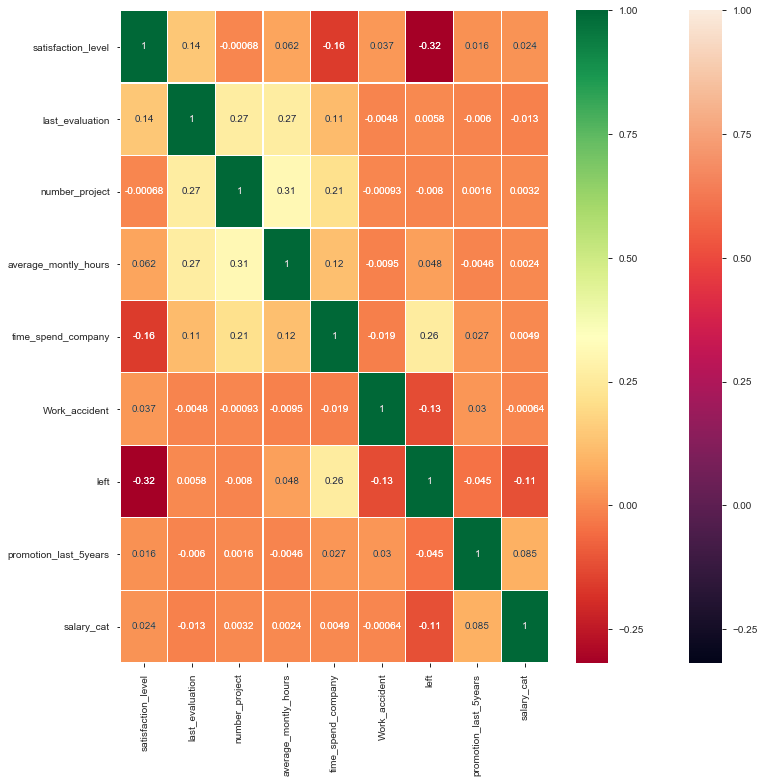

In [16]:
corr_mx_spearman = df.corr(method='spearman')

sns.heatmap(corr_mx_spearman, annot=True)
sns.heatmap(corr_mx_spearman,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

На всякий случай для рассчета корреляции использовали и метод Пирсона, и метод Спирмена. Существенных различий в результах между методами нет.

Сильных и даже средних корреляций нет. Рассмотрим хотя бы корреляции (по Пирсону) со значением >= |0.2|:

 -  слабая отрицательная корреляция (-0,35) между уходом сотрудника из компании (left) и уровнем его удволетворенности (satisfaction_level). Это логично: чем ниже уровень удовлетворения от работы - тем больше шансов, что сотрудник покинет компанию;
 -  слабая корреляция (0,33) между средним количеством рабочих часов в месяц (average_monthly_hours) и количеством проектов (number_project) на сотруднике. Это логично, чем больше проектов у сотрудника - тем больше времени он тратит в месяц;
 -  слабая корреляция (0, 27) между последней оценкой сотрудника (last_evaluation) и количеством проектов (number_project) у сотрудника. Возможно, чем больше нагрузки берет на себя сотрудник, тем его лучше оценивает руководство;
 -   слабая корреляция (0, 26) между последней оценкой сотрудника (last_evaluation) и средним количеством отработанных в месяце часов (average_monthly_hours). Возможно, чем больше нагрузки берет на себя сотрудник, тем его лучше оценивает руководство.


#### 4.Визуализировать несколько взаимосвязей между переменными

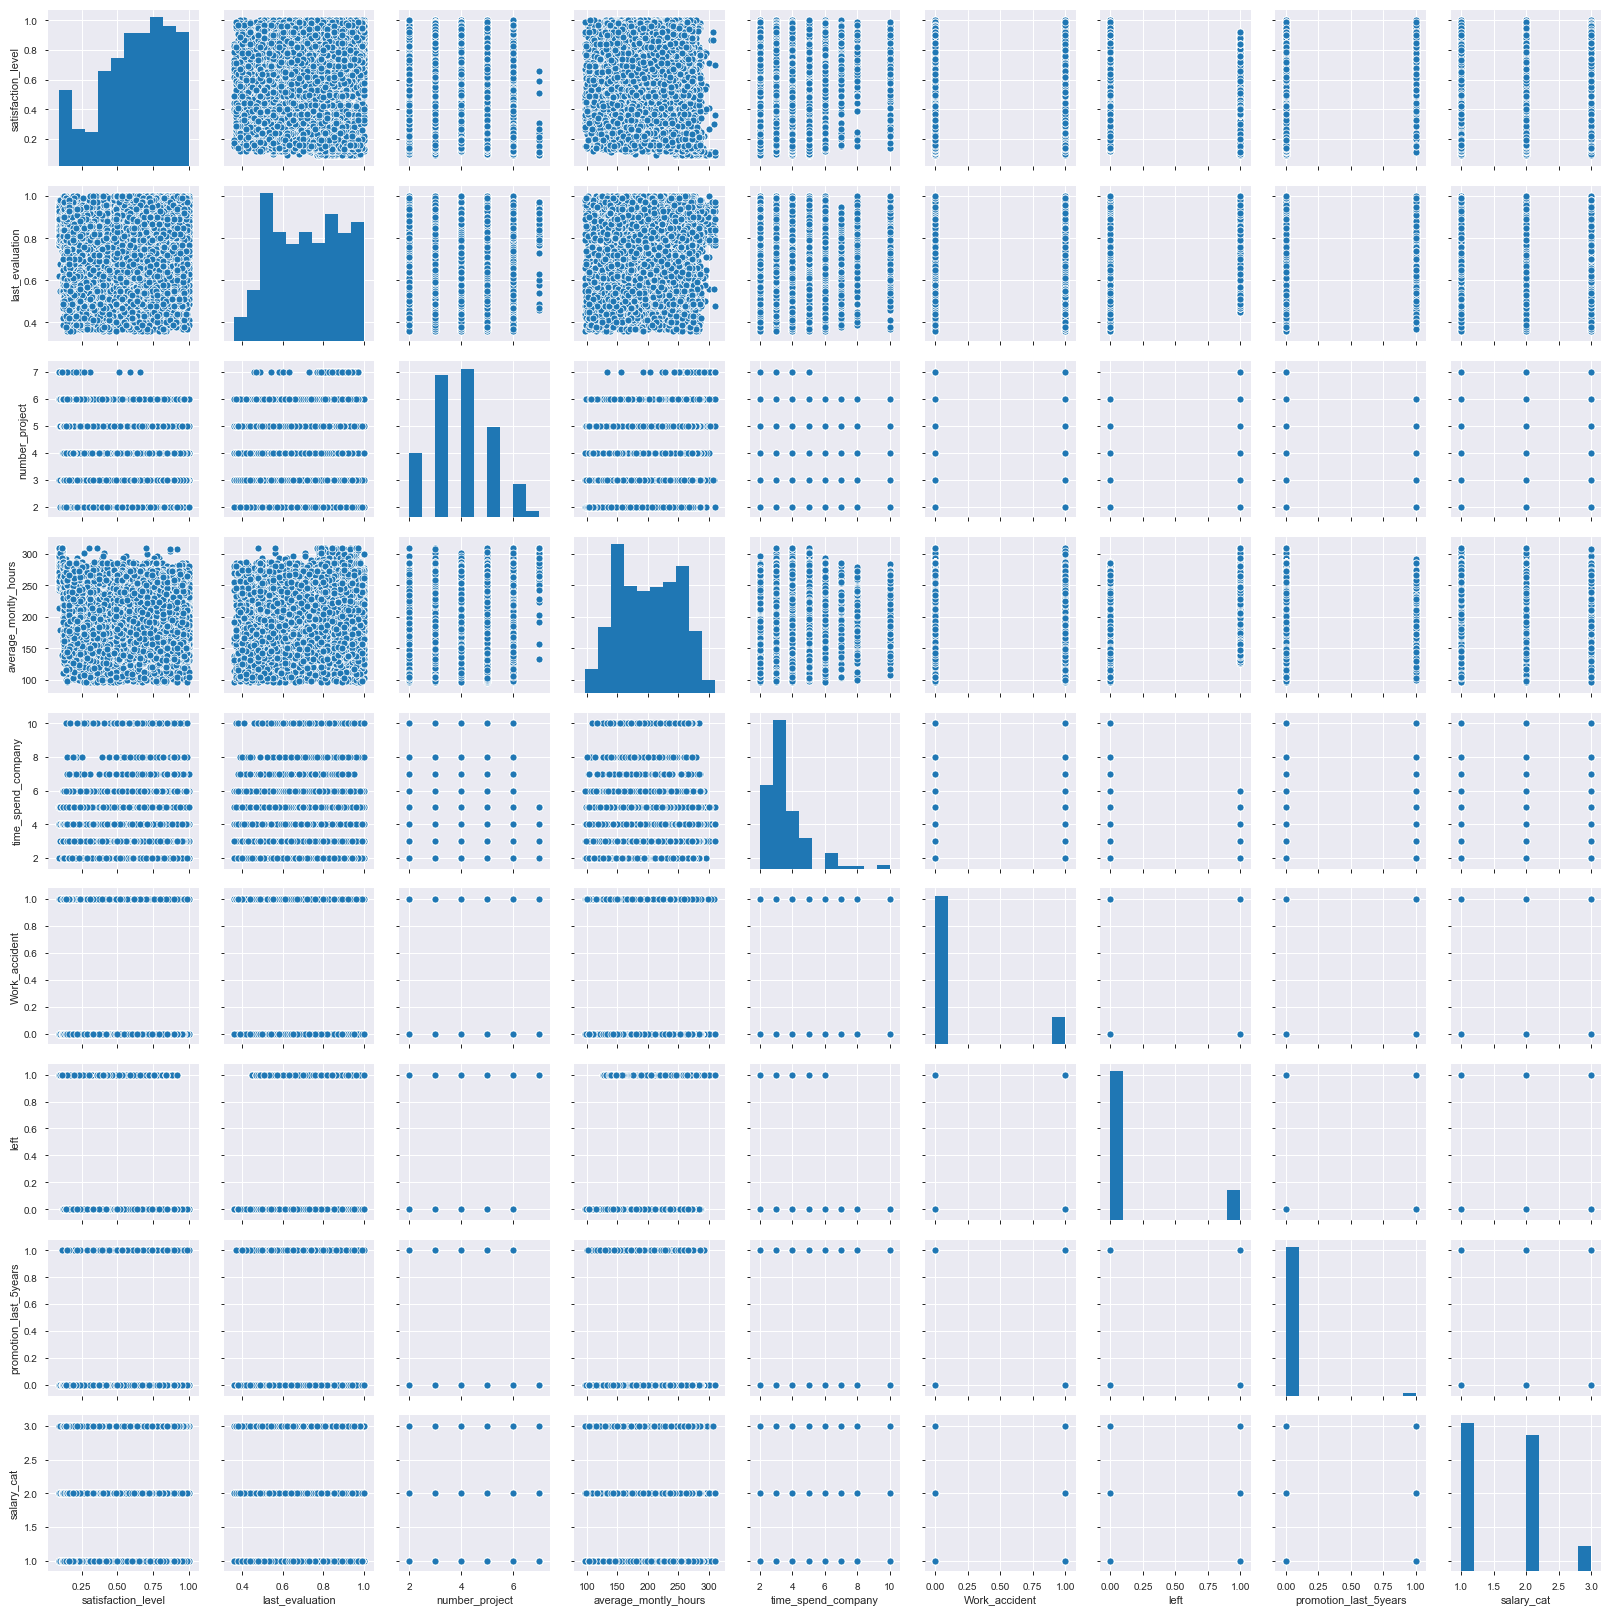

In [17]:
sns.pairplot(df);

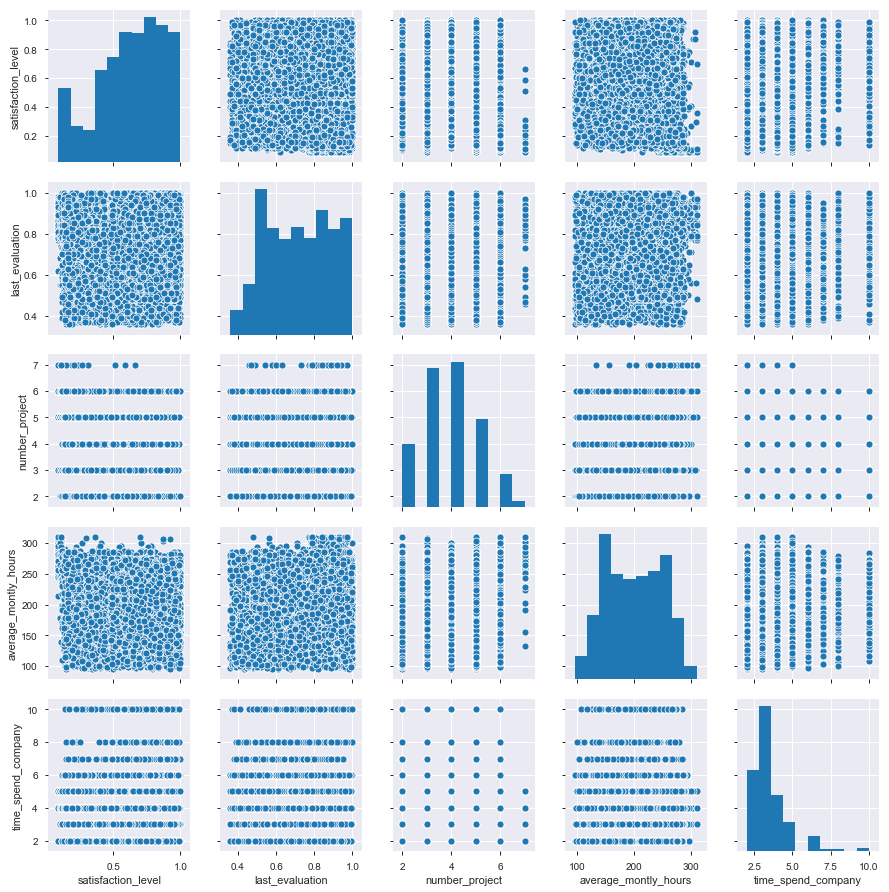

In [18]:
# Визуализируем взаимосвязи только между числовыми переменными.
sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], kind='scatter')

Полезной информации не так много, но можно сделать некоторые выводы:
 - нет данных о сотрудниках, проработавших в компании 9 лет;
 - у сотрудников с максимальным количеством проектов (7 проектов) уровень удовлетворенности тяготеет к более низким значениям, высоких и средних значений значительно меньше, чем в группах с меньшим количеством проектов. Это может быть связано с перегруженностью сотрудников;
 - у сотрудников, которые долго работают в компании, или у кого низкая предыдущая оценка меньше вероятность получить максимальное число проектов.
 
Визуализируем дополнительно эти параметры, добавив информацию об уволнении сотрудников 

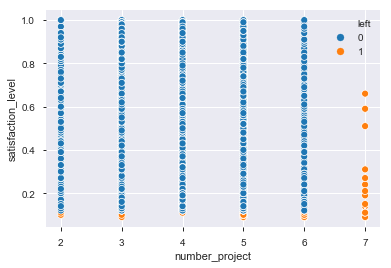

In [22]:
ax_1 = sns.scatterplot(x='number_project', y='satisfaction_level',
                     data=df, hue='left')

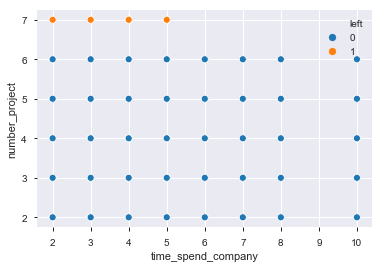

In [23]:
ax_2 = sns.scatterplot(x='time_spend_company', y='number_project',
                     data=df, hue='left')

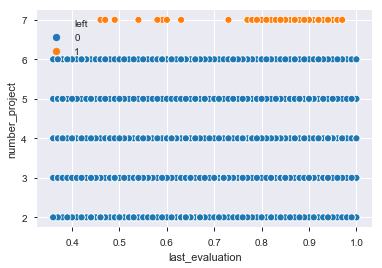

In [24]:
ax_3 = sns.scatterplot(x='last_evaluation', y='number_project',
                     data=df, hue='left')

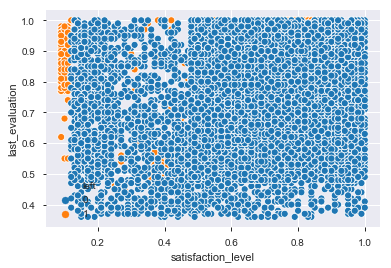

In [25]:
ax_4 = sns.scatterplot(x='satisfaction_level', y='last_evaluation',
                     data=df, hue='left')

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#### 1) Нулевая гипотеза: уровень удовлетворенности (satisfaction_level) одинаковый у сотрудников с высокой и низкой зарплатой (salary)

In [33]:
sat_high = df[df['salary'] == 'high']['satisfaction_level']
sat_low = df[df['salary'] == 'low']['satisfaction_level']

len(sat_high), len(sat_low)

(990, 5740)

In [34]:
sat_high = sat_high.sample(990)
sat_low = sat_low.sample(990)

In [35]:
statistics.variance(sat_high), statistics.variance(sat_low)

(0.05135251085169184, 0.057825796999315705)

In [37]:
sts.ttest_ind(sat_high, sat_low, equal_var=False)

Ttest_indResult(statistic=0.5713479431026957, pvalue=0.5678289483586485)

#### полученное значение pvalue=0.5678, что больше 0,05. Таким образом мы не можем отклонить нулевую гипотезу об отсутствии статистической разницы между уровнем удовлетворенности высокооплачиваемых и низкооплачиваемых сотрудников.

#### 2) Нулевая гипотеза: нет статистически значимой разницы в уровне удовлетворенности (satisfaction_level) работающих и уволившихся сотрудников (left)

In [26]:
sat_left = df[df['left'] == 1]['satisfaction_level']
sat_stay = df[df['left'] == 0]['satisfaction_level']

len(sat_left), len(sat_stay)

(1991, 10000)

In [27]:
sat_left = sat_left.sample(1991)
sat_stay = sat_stay.sample(1991)

In [28]:
statistics.variance(sat_left), statistics.variance(sat_stay)

(0.07033459976931367, 0.04512748680620581)

In [29]:
sts.ttest_ind(sat_left, sat_stay, equal_var=False)

Ttest_indResult(statistic=-30.163647482359504, pvalue=2.237113362252648e-179)

#### полученное значение pvalue=2.237113362252648e-179, что гораздо меньше 0,05. В этом случае отвергаем нулевую гипотезу H0 в пользу альтернативной: уровень удовлетворения от работы может влиять на решение сотрудника покинуть компанию.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [34]:
# сколько всего, с учетом уволившихся
employee_by_dep_all = df.groupby('sales').count()[['salary']].rename(columns={"salary":"count"}).reset_index().sort_values(by='count', ascending=False)
employee_by_dep_all

,sales,count
7,sales,3239
9,technical,2244
8,support,1821
0,IT,976
1,RandD,694
6,product_mng,686
5,marketing,673
2,accounting,621
3,hr,601
4,management,436


In [35]:
# количество сотрудников по департаментам без учета уволившихся
employee_by_dep_actual = df[df['left']==0].groupby('sales').count()[['salary']].rename(columns={"salary":"count"}).reset_index().sort_values(by='count', ascending=False)
employee_by_dep_actual

,sales,count
7,sales,2689
9,technical,1854
8,support,1509
0,IT,818
1,RandD,609
6,product_mng,576
5,marketing,561
2,accounting,512
3,hr,488
4,management,384


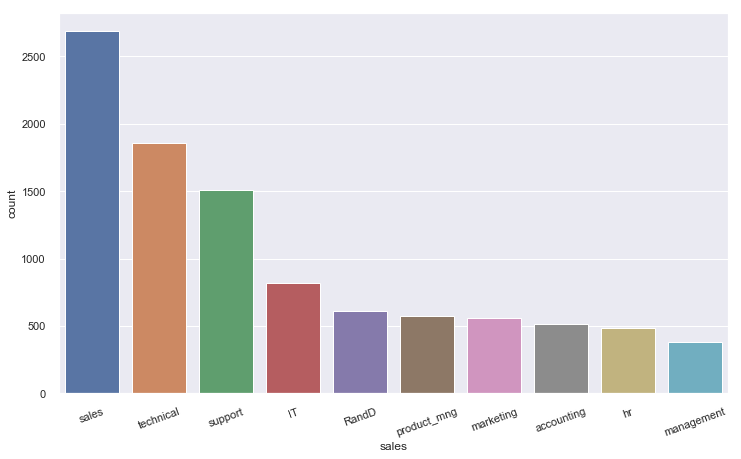

In [42]:
employee_by_dep_actual_bar = sns.barplot(x=employee_by_dep_actual['sales'], y=employee_by_dep_actual['count'])
for item in employee_by_dep_actual_bar.get_xticklabels(): 
    item.set_rotation(20) 
sns.set(rc={'figure.figsize':(7, 12)})

### 7. Показать распределение сотрудников по зарплатам

In [45]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [48]:
# посмотрим в процентном соотношении
df.salary.value_counts(normalize=True)*100

low       47.869235
medium    43.874573
high       8.256192
Name: salary, dtype: float64

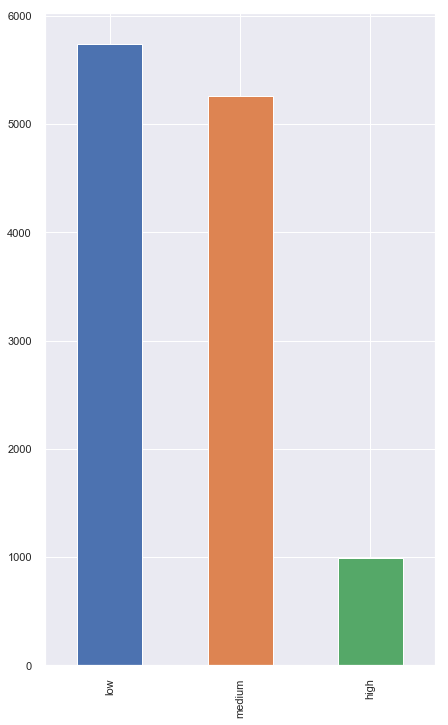

In [51]:
df.salary.value_counts().plot(kind='bar')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [55]:
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['low', 'medium', 'high'])
salary_by_dep

count_by_salary
sales       salary                 
IT          low                 476
            medium              429
            high                 71
RandD       low                 322
            medium              325
            high                 47
accounting  low                 296
            medium              262
            high                 63
hr          low                 296
            medium              267
            high                 38
management  low                 139
            medium              169
            high                128
marketing   low                 310
            medium              301
            high                 62
product_mng low                 343
            medium              291
            high                 52
sales       low                1553
            medium             1449
            high                237
support     low                 867
            medium              828
            high                126
technical   low                1138
            medium              940
            high                166

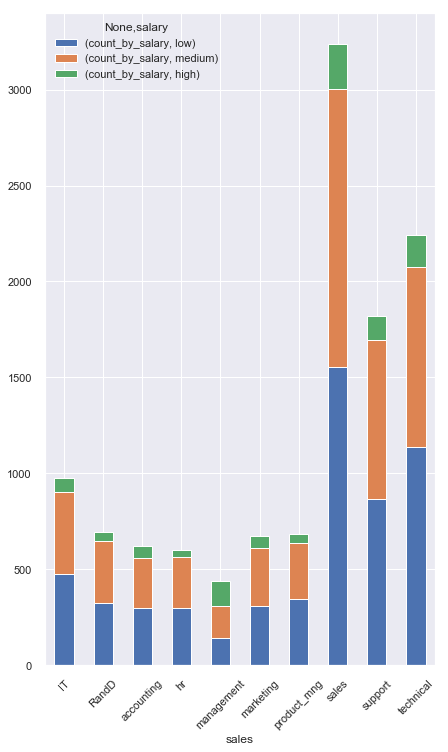

In [64]:
salary_by_dep.unstack('salary').plot(kind='bar', rot=45, stacked=True)

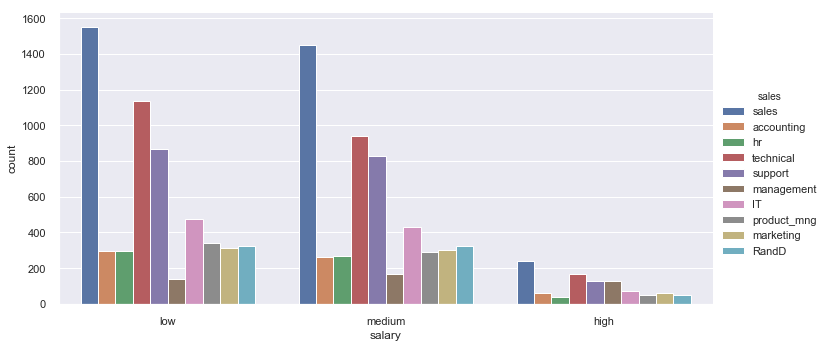

In [65]:
sns.catplot(x='salary', kind='count', data=df, hue='sales', aspect=2,
            order=['low', 'medium', 'high'])

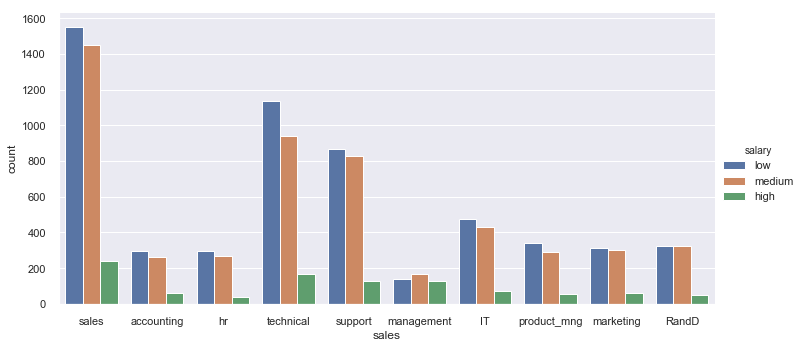

In [66]:
sns.catplot(x='sales', kind='count', data=df, hue='salary', aspect=2)

### 9. Сколько сотрудников покинули компанию

In [68]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [70]:
df.left.value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

#### компанию покинул 1991 сотрудник или 16,6% 

### 10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

In [72]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_cat
left,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,1.637600
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,1.434455


Посмотрим на средние значения показателей в разрезе статуса сотрудников (уволился или нет).
- в среднем уровень удовлетворенности у уволившихся меньше, чем у оставшихся;
- уволившиеся в среднем больше часов работали в месяц;
- уволившиеся реже получали повышение (promotion_last_5years);

Проверим статистическую значимость данных сравнений при помощи t-test.

#### 1) Ранее в задании №5 мы проверили гипотезу о связи между уровнем удовлетворенности и увольнением и получили значение pvalue=2.237113362252648e-179, что гораздо меньше 0,05. Мы отвергли нулевую гипотезу в пользу альтернативной: уровень удовлетворения от работы может влиять на решение сотрудника покинуть компанию.¶

##### 2) Нулевая гипотеза: уволившиеся и неуволившиеся сотрудники в среднем работают одинаковое количество часов в месяц 

In [73]:
avgh_left = df[df['left'] == 1]['average_montly_hours']
avgh_stay = df[df['left'] == 0]['average_montly_hours']

len(avgh_left), len(avgh_stay)

(1991, 10000)

In [74]:
avgh_left = sat_left.sample(1991)
avgh_stay = sat_stay.sample(1991)

In [75]:
statistics.variance(avgh_left), statistics.variance(avgh_stay)

(0.07033459976931367, 0.04512748680620581)

In [76]:
sts.ttest_ind(avgh_left, avgh_stay, equal_var=False)

Ttest_indResult(statistic=-30.163647482359504, pvalue=2.237113362252392e-179)

##### полученное значение pvalue=2.237113362252392e-179 меньше 0,05. Отвергаем нулевую гипотезу. То есть разница в средних не обусловлена случаными колебаниям.

##### 3) Нулевая гипотеза: уволившиеся и неуволившиеся сотрудники в среднем одинаково часто получали повышение

In [77]:
prom_left = df[df['left'] == 1]['promotion_last_5years']
prom_stay = df[df['left'] == 0]['promotion_last_5years']

len(prom_left), len(prom_stay)

(1991, 10000)

In [78]:
prom_left = prom_left.sample(1991)
prom_stay = prom_stay.sample(1991)

In [79]:
statistics.variance(prom_left), statistics.variance(prom_stay)

(0.004003947411593376, 0.015821952555343265)

In [80]:
sts.ttest_ind(prom_left, prom_stay, equal_var=False)

Ttest_indResult(statistic=-3.8199630002863088, pvalue=0.00013623498631650297)

##### полученное значение pvalue=0.000136 меньше 0,05. Отвергаем нулевую гипотезу. 